In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Head to the dataset directory
%cd '/content/drive/Shared drives/AC209A Final Project/data'

/content/drive/Shared drives/AC209A Final Project/data


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Clean Missing & Incorrect Data

In [4]:
# Load csv flight data
df_flight = pd.read_csv('flight.csv')
display(df_flight.head(5))

<ipython-input-4-946aa338e6ce>:2: DtypeWarning: Columns (4,11,12,36,37,38,39,40,42,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,64,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,86,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,108,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,130,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,152,154,155,156,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,174,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,218,220,221,222,224,225,227,228,229,230,231,232,233,234,235,236,237,238,240,242,243,244,246,247,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,284,286,287,288,289,290,291,293,294,295,296,297,298,299,300,301,302,303,304,306,308,309,310,311,3

,Airline name,Travel Time,Unnamed: 2,Number of Stoppage,Ticket prize(Doller),Depreture Airport,Depreture Time,1st Stoppage Waiting Hour,1st Stoppage,2nd StoppageWaiting Time,...,Unnamed: 485,Unnamed: 486,Unnamed: 487,Unnamed: 488,Unnamed: 489,Unnamed: 490,Unnamed: 491,Unnamed: 492,Unnamed: 493,Unnamed: 494
0,Emirates,51h 15m,NaN,2 Stops,1156,DAC,01:40a,11h 15m,DXB,19h 40m,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Emirates,57h 25m,NaN,2 Stops,1156,DAC,07:30p,17h 15m,DXB,19h 40m,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Turkish,26h 5m,NaN,1 Stop,1175,DAC,06:35a,6h 20m,IST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Kuwait,21h 15m,NaN,1 Stop,1264,DAC,03:10a,2h 10m,KWI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Etihad,22h 35m,NaN,1 Stop,1283,DAC,08:55p,3h 0m,AUH,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_flight.shape

(2461, 495)

In [ ]:
df_flight.columns

Index(['Airline name ', 'Travel  Time', 'Unnamed: 2', 'Number of  Stoppage ',
       'Ticket prize(Doller)', 'Depreture  Airport', 'Depreture Time',
       '1st Stoppage Waiting Hour', '1st Stoppage', '2nd StoppageWaiting Time',
       ...
       'Unnamed: 485', 'Unnamed: 486', 'Unnamed: 487', 'Unnamed: 488',
       'Unnamed: 489', 'Unnamed: 490', 'Unnamed: 491', 'Unnamed: 492',
       'Unnamed: 493', 'Unnamed: 494'],
      dtype='object', length=495)

### Genral Cleaning

In [ ]:
# Drop all columns after 16th column as they do not offer any information
df_flight = df_flight.iloc[:, :16]

# Drop the third column as the values are all NaN
df_flight = df_flight.drop(columns=['Unnamed: 2'])

In [ ]:
# Rename the column titles
print(f'before renaming: {list(df_flight.columns)}')
new_col_names = ['air_name', 'travel_time', 'num_stop', 'ticket_price', 'depart_air', 'depart_time',
                 '1_stop_wait', '1_stop', '2_stop_wait', '2_stop', '3_stop_wait', '3_stop', 'dest_air',
                 'arrival_time', 'arrival_date']
df_flight.columns = new_col_names
display(df_flight.head(5))
print(df_flight.dtypes)
df_flight.describe()

before renaming: ['Airline name ', 'Travel  Time', 'Number of  Stoppage ', 'Ticket prize(Doller)', 'Depreture  Airport', 'Depreture Time', '1st Stoppage Waiting Hour', '1st Stoppage', '2nd StoppageWaiting Time', '2nd Stoppage', '3rd Stoppage Waiting time', '3rd Stoppage', 'Destination Airport', 'Arrival Time', 'Arrival Date']


,air_name,travel_time,num_stop,ticket_price,depart_air,depart_time,1_stop_wait,1_stop,2_stop_wait,2_stop,3_stop_wait,3_stop,dest_air,arrival_time,arrival_date
0,Emirates,51h 15m,2 Stops,1156,DAC,01:40a,11h 15m,DXB,19h 40m,MXP,NaN,NaN,JFK,06:55p,Apr 8
1,Emirates,57h 25m,2 Stops,1156,DAC,07:30p,17h 15m,DXB,19h 40m,MXP,NaN,NaN,JFK,06:55p,Apr 9
2,Turkish,26h 5m,1 Stop,1175,DAC,06:35a,6h 20m,IST,NaN,NaN,NaN,NaN,EWR,10:40p,NaN
3,Kuwait,21h 15m,1 Stop,1264,DAC,03:10a,2h 10m,KWI,NaN,NaN,NaN,NaN,JFK,02:25p,NaN
4,Etihad,22h 35m,1 Stop,1283,DAC,08:55p,3h 0m,AUH,NaN,NaN,NaN,NaN,JFK,09:30a,Apr 8


air_name        object
travel_time     object
num_stop        object
ticket_price    object
depart_air      object
depart_time     object
1_stop_wait     object
1_stop          object
2_stop_wait     object
2_stop          object
3_stop_wait     object
3_stop          object
dest_air        object
arrival_time    object
arrival_date    object
dtype: object


,air_name,travel_time,num_stop,ticket_price,depart_air,depart_time,1_stop_wait,1_stop,2_stop_wait,2_stop,3_stop_wait,3_stop,dest_air,arrival_time,arrival_date
count,2459,2461,2461,2458,2164,2460,2402,2401,655,656,17,17,2167,2451,2310
unique,57,756,5,822,11,278,496,81,210,47,5,1,21,297,7
top,Multiple,16h 5m,1 Stop,1508,JFK,10:50a,2h 10m,DOH,4h 0m,LHR,3h 20m,MIA,BKK,04:35a,Apr 8
freq,546,20,1647,73,484,78,45,387,25,96,6,17,572,57,1717


### Clean air_name and ticket_price

In [ ]:
# Since we only have a few missing entries in Airlnie name, we simply drop them all.
df_flight = df_flight[~df_flight['air_name'].isna()]

# Uniform ticket_price
df_flight.loc[:, 'ticket_price'] = df_flight['ticket_price'].replace('$', np.nan)
df_flight = df_flight[~df_flight['ticket_price'].isna()]

<ipython-input-8-fabab0dfe971>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flight.loc[:, 'ticket_price'] = df_flight['ticket_price'].replace('$', np.nan)


### Clean num_stop

In [ ]:
print(f'Unique values of num_stop before cleaning: {df_flight.num_stop.unique()}')

# We need to remove rows where num_stop entry displays 'EXPRESS DEAL'
df_flight = df_flight[~(df_flight['num_stop']=='EXPRESS DEAL')]
print(f'Unique values of num_stop after cleaning: {df_flight.num_stop.unique()}')

Unique values of num_stop before cleaning: ['2 Stops' '1 Stop' 'Nonstop' 'EXPRESS DEAL' '3 Stops']
Unique values of num_stop after cleaning: ['2 Stops' '1 Stop' 'Nonstop' '3 Stops']


### Clean depart_air and dest_air

In [ ]:
# Fill 'MISS' to the flight with missing depart_air or dest_air
df_flight['depart_air'] = df_flight['depart_air'].fillna('MISS')
df_flight['dest_air'] = df_flight['dest_air'].fillna('MISS')

### Clean arrival_date

In [ ]:
# Standardize arrival_date
print(f"Unique values of arrival_date before cleaning: {df_flight['arrival_date'].unique()}")
df_flight['arrival_date'] = df_flight['arrival_date'].replace('Cheapest', np.nan)
df_flight['arrival_date'] = df_flight['arrival_date'].replace('Shortest Duration', np.nan)
df_flight['arrival_date'] = df_flight['arrival_date'].replace('Free cancellation within 50 hours of booking', np.nan)
df_flight['arrival_date'] = df_flight['arrival_date'].replace('Arrives: Mon, Apr 10', 'Apr 10')
df_flight['arrival_date'] = df_flight['arrival_date'].replace('   Apr 8', 'Apr 8')
df_flight['arrival_date'] = df_flight['arrival_date'].replace('   Apr 9', 'Apr 9')
print(f"Unique values of arrival_date after cleaning: {df_flight['arrival_date'].unique()}")

Unique values of arrival_date before cleaning: ['   Apr 8' '   Apr 9' nan 'Arrives: Mon, Apr 10' 'Shortest Duration'
 'Cheapest' 'Free cancellation within 50 hours of booking']
Unique values of arrival_date after cleaning: ['Apr 8' 'Apr 9' nan 'Apr 10']


### Clean _stop and _stop_wait and Consistency Check

In [ ]:
# Manually identify the incorrect entries in 2_stop_wait and 2_stop
df_flight['2_stop_wait'] = df_flight['2_stop_wait'].replace('sc-jRQBWg 3', None)
df_flight['2_stop'] = df_flight['2_stop'].replace('sc-eCImPb 5', None)
df_flight['2_stop'] = df_flight['2_stop'].apply(lambda x: str(x)[:3] if pd.notnull(x) else x)

In [ ]:
# As we observed that dtype for all columns are objects, we convert some of them to numerical type.
def convert_to_minutes(time_str):
  if time_str == 'MISS':
      return 0
  else:
      time_components = re.findall(r'\d+', time_str)
      if len(time_components) == 2:
          # Time format is '20h 30m'
          hours, minutes = map(int, time_components)
          return hours * 60 + minutes
      elif len(time_components) == 1:
          # Time format is '30m'
          return int(time_components[0])
      else:
          raise ValueError(f"Invalid time format: {time_str}")

def stops_to_int(stops_str):
  if stops_str == 'Nonstop':
    return 0
  else:
    return int(stops_str[0])

df_flight[['travel_time',  '1_stop_wait', '2_stop_wait', '3_stop_wait']] = df_flight[['travel_time',  '1_stop_wait', '2_stop_wait', '3_stop_wait']].fillna('MISS')
df_flight['travel_time'] = df_flight['travel_time'].apply(convert_to_minutes)
df_flight['1_stop_wait'] = df_flight['1_stop_wait'].apply(convert_to_minutes)
df_flight['2_stop_wait'] = df_flight['2_stop_wait'].apply(convert_to_minutes)
df_flight['3_stop_wait'] = df_flight['3_stop_wait'].apply(convert_to_minutes)
df_flight['num_stop'] = df_flight['num_stop'].apply(stops_to_int)
df_flight['ticket_price'] = df_flight['ticket_price'].astype(int)

In [ ]:
# Check if _stop_wait and _stop are consistant and display the inconsistant rows
def validate_stop_wait_consistency(df):
  inconsistent_rows = []

  for index, row in df.fillna(0).iterrows():
      stops_info = [
          (row['1_stop_wait'], row['1_stop']),
          (row['2_stop_wait'], row['2_stop']),
          (row['3_stop_wait'], row['3_stop'])
      ]
      # Check for inconsistencies in stop and wait time pair
      for wait_time, stop in stops_info:
        if ((wait_time > 0) and (stop == 0)) or ((wait_time == 0) and (stop != 0)):
          inconsistent_rows.append(index)
          break

  return df.loc[inconsistent_rows] if inconsistent_rows else None

inconsistent_stop_wait_rows = validate_stop_wait_consistency(df_flight)
print('Inconsistant rows:')
display(inconsistent_stop_wait_rows)

Inconsistant rows:


,air_name,travel_time,num_stop,ticket_price,depart_air,depart_time,1_stop_wait,1_stop,2_stop_wait,2_stop,3_stop_wait,3_stop,dest_air,arrival_time,arrival_date
876,American,890,1,692,MISS,10:05p,330,NaN,0,NaN,0,NaN,MISS,06:55p,NaN
1432,Virgin Atlantic,2470,2,1258,JFK,06:00a,148,BOS,0,LHR,0,NaN,BOM,08:40a,Apr 9


In [ ]:
df_flight = df_flight.drop(inconsistent_stop_wait_rows.index)
inconsistent_stop_wait_rows = validate_stop_wait_consistency(df_flight)
print('After fix:')
print('Inconsistant rows:')
display(inconsistent_stop_wait_rows)

After fix:
Inconsistant rows:


None

In [ ]:
# Check if num_stop is consistant with _stop_wait and _stop are and display the inconsistant rows
def validate_stops(df):
    inconsistent_rows = []

    for index, row in df.iterrows():
        num_stops = row['num_stop']
        stops_info = [(row['1_stop_wait'], row['1_stop']),
                      (row['2_stop_wait'], row['2_stop']),
                      (row['3_stop_wait'], row['3_stop'])]

        # Count actual stops
        actual_stops = sum(1 for wait, stop in stops_info if stop is not None and wait > 0)

        if num_stops != actual_stops:
            inconsistent_rows.append(index)

    return df.loc[inconsistent_rows] if inconsistent_rows else None

inconsistent_rows = validate_stops(df_flight)
print('Inconsistant rows:')
display(inconsistent_rows)

Inconsistant rows:


,air_name,travel_time,num_stop,ticket_price,depart_air,depart_time,1_stop_wait,1_stop,2_stop_wait,2_stop,3_stop_wait,3_stop,dest_air,arrival_time,arrival_date
475,Multiple,1425,2,859,STN,02:55p,150,DXB,0,NaN,0,NaN,LGA,08:40p,Apr 8
476,Multiple,1450,2,867,LGW,02:30p,175,DXB,0,NaN,0,NaN,EWR,08:40p,Apr 8
482,KLM-Royal Dutch,1790,2,872,LHR,08:55p,450,AMS,0,NaN,0,NaN,EWR,08:45a,Apr 9
517,Multiple,1340,2,931,LGW,10:05a,75,DXB,0,NaN,0,NaN,EWR,02:25p,Apr 8
518,Multiple,1715,2,931,LGW,10:05a,450,DXB,0,NaN,0,NaN,LGA,08:40p,Apr 8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456,British,2855,2,2654,DAC,10:50a,695,DOH,0,NaN,0,NaN,DXB,08:25a,Apr 9
2457,Multiple,1155,2,3307,DAC,12:50a,110,CAN,0,NaN,0,NaN,DXB,06:05p,NaN
2458,Multiple,1410,2,3606,DAC,12:50a,240,CAN,0,NaN,0,NaN,DXB,10:20p,NaN
2459,Multiple,1410,2,3606,DAC,12:50a,190,CAN,0,NaN,0,NaN,DXB,10:20p,NaN


In [ ]:
df_flight = df_flight.drop(inconsistent_rows.index)
inconsistent_rows = validate_stops(df_flight)
print('After fix:')
print('Inconsistant rows:')
display(inconsistent_rows)

After fix:
Inconsistant rows:


None

In [ ]:
# Fill None value in _stop with NON indicating no stop presents. (Not missing values)
df_flight[['1_stop',	'2_stop',	'3_stop']] = df_flight[['1_stop',	'2_stop',	'3_stop']].fillna('NON')

### Convert depart_time and arrival_time

In [ ]:
def convert_time_to_float(time_str):
  if pd.isna(time_str):
      return np.nan
  # Extract hours, minutes, and AM/PM
  hours, minutes_ampm = time_str[:].split(':')
  minutes, ampm = minutes_ampm[:-1], minutes_ampm[-1]

  # Convert to 24-hour format
  hours = int(hours)
  if ampm == 'p' and hours < 12:
      hours += 12
  elif ampm == 'a' and hours == 12:
      hours = 0

  # Convert to float
  return hours + int(minutes) / 60

df_flight['depart_time'] = df_flight['depart_time'].apply(convert_time_to_float)
df_flight['arrival_time'] = df_flight['arrival_time'].apply(convert_time_to_float)

### Impute arrival_time and Consistency Check


In [ ]:
airport_time_zones = {
    'DAC': 6,    # Dhaka
    'JFK': -5,   # New York
    'LGA': -5,   # New York
    'EWR': -5,   # New Jersey
    'LHR': 0,    # London
    'STN': 0,    # London
    'LGW': 0,    # London
    'LCY': 0,    # London
    'DXB': 4,    # Dubai
    'SHJ': 4,    # Sharjah
    'BOM': 5.5,  # Mumbai
    'IST': 3,    # Istanbul
    'ORD': -6,   # Chicago
    'DFW': -6,   # Dallas
    'DEL': 5.5,  # Delhi
    'BKK': 7,    # Bangkok
    'CDG': 1,    # Paris
    'ORY': 1,    # Paris
    'LAS': -8,   # Las Vegas
    'DMK': 7,    # Bangkok
    'MLE': 5,    # Malé
    'MISS': 0,   # Placeholder for missing
}
def time_zone_difference(depart_air, dest_air):
    depart_offset = airport_time_zones.get(depart_air, 0)
    dest_offset = airport_time_zones.get(dest_air, 0)
    return dest_offset - depart_offset

print(time_zone_difference('DAC', 'JFK'))
df_flight['arrival_time_est'] = (df_flight['depart_time'] + df_flight['travel_time']/60 +
                                 df_flight.apply(lambda x: time_zone_difference(x['depart_air'], x['dest_air']), axis=1)) % 24 + 1
df_flight['arrival_time_est']

-11


0       18.916667
1       18.916667
2       22.666667
3       14.416667
4        9.500000
          ...    
2447    15.500000
2450    19.166667
2451    24.916667
2452     7.333333
2453    24.083333
Name: arrival_time_est, Length: 2331, dtype: float64

In [ ]:
# Consider day-time saving and various time zone issues, this result is very good, indicating a good imputation model
(df_flight['arrival_time_est'] - df_flight['arrival_time']).describe()

count    2.322000e+03
mean    -2.927792e-01
std      8.550970e+00
min     -2.200000e+01
25%     -5.329071e-15
50%      7.500000e-01
75%      2.000000e+00
max      2.391667e+01
dtype: float64

In [ ]:
df_flight['arrival_time'] = df_flight['arrival_time'].fillna((df_flight['depart_time'] + df_flight['travel_time']/60 +
                                 df_flight.apply(lambda x: time_zone_difference(x['depart_air'], x['dest_air']), axis=1)) % 24 + 1)
df_flight = df_flight.drop(columns=['arrival_time_est'])

### Impute arrival_date

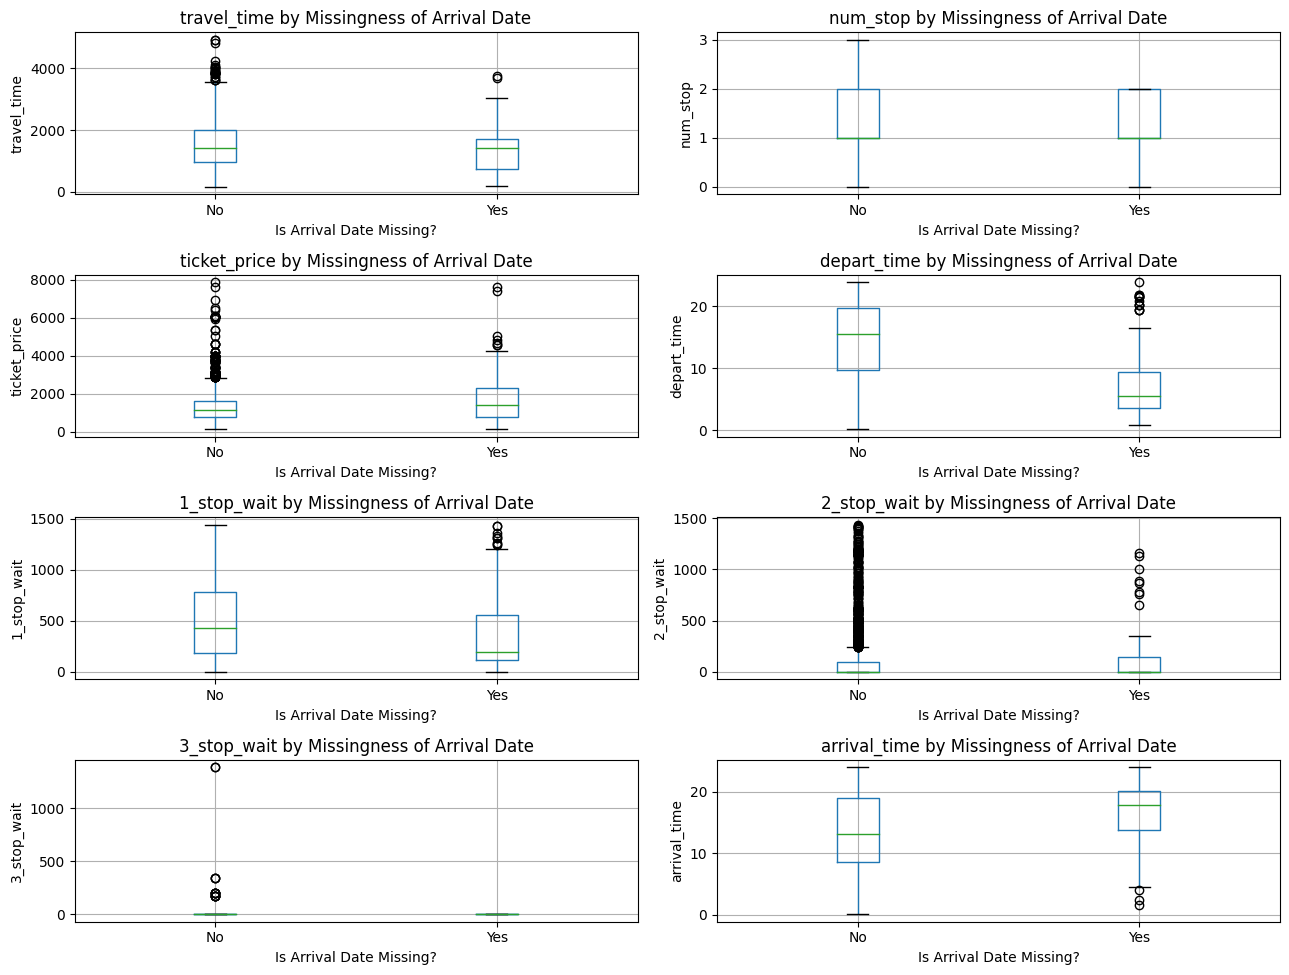

In [ ]:
df_flight['arrival_date_missing'] = df_flight['arrival_date'].isna()

variables = ['travel_time', 'num_stop', 'ticket_price', 'depart_time',
             '1_stop_wait', '2_stop_wait', '3_stop_wait', 'arrival_time']

fig = plt.figure(figsize=(13, 10))

for i, var in enumerate(variables, 1):
    ax = fig.add_subplot(4, 2, i)
    df_flight.boxplot(column=var, by='arrival_date_missing', ax=ax)
    ax.set_title(f'{var} by Missingness of Arrival Date')
    ax.set_xlabel('Is Arrival Date Missing?')
    ax.set_ylabel(var)
    ax.set_xticklabels(['No', 'Yes'])

fig.suptitle('')
plt.tight_layout()
plt.show()

df_flight = df_flight.drop(columns=['arrival_date_missing'])

In [ ]:
# Create a seprate dataframe for imputation
df_flight_impute = df_flight.copy().drop(columns=['ticket_price'])
df_flight_impute_X_train = df_flight_impute[~df_flight_impute['arrival_date'].isna()].drop(columns=['arrival_date'])
df_flight_impute_X_test = df_flight_impute[df_flight_impute['arrival_date'].isna()].drop(columns=['arrival_date'])
df_flight_impute_y_train = df_flight_impute['arrival_date'][~df_flight_impute['arrival_date'].isna()]

cat_vars = ['air_name', 'depart_air', '1_stop', '2_stop', '3_stop', 'dest_air']
num_vars = df_flight_impute.select_dtypes(include=['int64', 'float64']).columns.tolist()

# One-Hot Encoding for categorical variables
ohe = OneHotEncoder(drop='first',
                    sparse_output=False,
                    handle_unknown='ignore')
ohe.fit(df_flight_impute[cat_vars])
ohe_train = ohe.transform(df_flight_impute_X_train[cat_vars])
ohe_test = ohe.transform(df_flight_impute_X_test[cat_vars])

# StandardScaler for numerical variables
scaler = StandardScaler()
scaled_train = scaler.fit_transform(df_flight_impute_X_train[num_vars])
scaled_test = scaler.transform(df_flight_impute_X_test[num_vars])

# Combine categorical and numerical variables
X_train = np.hstack([ohe_train, scaled_train])
X_test = np.hstack([ohe_test, scaled_test])

# Apply PCA and choose top 3 PCs
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train RandomForestClassifier and impute arrival_date
rf = RandomForestClassifier(max_depth=5)
rf.fit(X_train_pca, df_flight_impute_y_train)
predicted_dates = rf.predict(X_test_pca)

In [ ]:
# Apply imputation
df_flight.loc[df_flight['arrival_date'].isna(), 'arrival_date'] = predicted_dates

In [ ]:
train_accuracy = rf.score(X_train_pca, df_flight_impute_y_train)
train_accuracy

0.9404761904761905

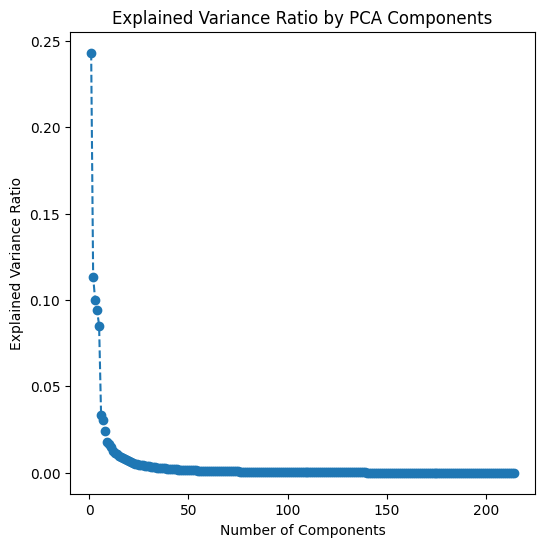

In [ ]:
pca = PCA(n_components=X_train.shape[1])
X_train_pca = pca.fit_transform(X_train)
num_features = X_train.shape[1]

plt.figure(figsize=(6, 6))
plt.plot(range(1, num_features + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance Ratio by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

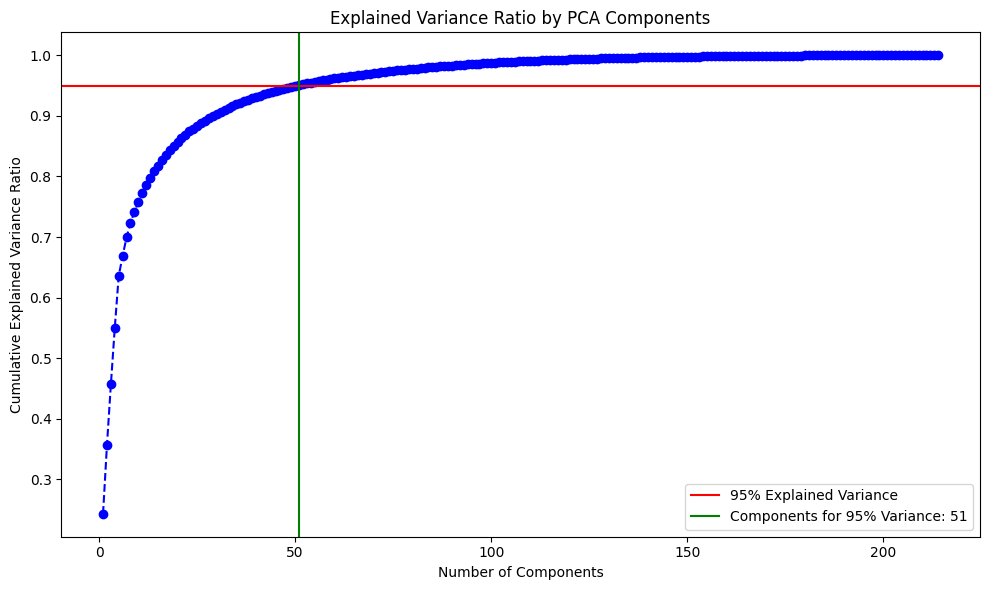

51


In [ ]:
pca = PCA(n_components=X_train.shape[1])
X_train_pca = pca.fit_transform(X_train)

cumulative_variance = pca.explained_variance_ratio_.cumsum()
num_features = X_train.shape[1]

n_components_95 = np.where(cumulative_variance >= 0.95)[0][0] + 1


plt.figure(figsize=(10, 6))
plt.plot(range(1, num_features + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Explained Variance')
plt.axvline(x=n_components_95, color='g', linestyle='-', label=f'Components for 95% Variance: {n_components_95}')

plt.title('Explained Variance Ratio by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
print(n_components_95)

In [ ]:
df_flight.to_csv('flight_cleaned.csv', index=False)

# Exploratory Data Analysis

### Data Description

In [ ]:
df_flight = pd.read_csv('flight_cleaned.csv')

# Add total stoppage time

df_flight['total_stoppage_time'] = df_flight['1_stop_wait'] + df_flight['2_stop_wait'] + df_flight['3_stop_wait']

In [ ]:
df_flight.describe()

,travel_time,num_stop,ticket_price,depart_time,1_stop_wait,2_stop_wait,3_stop_wait,arrival_time,total_stoppage_time
count,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000
mean,1543.887602,1.259545,1316.443157,13.911547,503.478764,117.942943,2.601888,13.474982,624.023595
std,738.012507,0.502344,884.396518,6.497327,382.043020,266.378851,44.461617,6.195352,470.689934
min,160.000000,0.000000,135.000000,0.166667,0.000000,0.000000,0.000000,0.083333,0.000000
25%,970.000000,1.000000,760.000000,8.625000,170.000000,0.000000,0.000000,8.750000,250.000000
50%,1410.000000,1.000000,1128.000000,15.083333,410.000000,0.000000,0.000000,13.416667,495.000000
75%,2007.500000,2.000000,1610.000000,19.583333,770.000000,120.000000,0.000000,19.000000,930.000000
max,4930.000000,3.000000,7867.000000,23.916667,1440.000000,1435.000000,1385.000000,24.000000,2695.000000


In [ ]:
display(df_flight.head(5))
display(df_flight.describe(datetime_is_numeric=True))
display(df_flight.describe(datetime_is_numeric=True, include='object'))
print(df_flight.dtypes)

,air_name,travel_time,num_stop,ticket_price,depart_air,depart_time,1_stop_wait,1_stop,2_stop_wait,2_stop,3_stop_wait,3_stop,dest_air,arrival_time,arrival_date,total_stoppage_time
0,Emirates,3075,2,1156,DAC,1.666667,675,DXB,1180,MXP,0,NON,JFK,18.916667,Apr 8,1855
1,Emirates,3445,2,1156,DAC,19.500000,1035,DXB,1180,MXP,0,NON,JFK,18.916667,Apr 9,2215
2,Turkish,1565,1,1175,DAC,6.583333,380,IST,0,NON,0,NON,EWR,22.666667,Apr 8,380
3,Kuwait,1275,1,1264,DAC,3.166667,130,KWI,0,NON,0,NON,JFK,14.416667,Apr 8,130
4,Etihad,1355,1,1283,DAC,20.916667,180,AUH,0,NON,0,NON,JFK,9.500000,Apr 8,180


,travel_time,num_stop,ticket_price,depart_time,1_stop_wait,2_stop_wait,3_stop_wait,arrival_time,total_stoppage_time
count,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000
mean,1543.887602,1.259545,1316.443157,13.911547,503.478764,117.942943,2.601888,13.474982,624.023595
std,738.012507,0.502344,884.396518,6.497327,382.043020,266.378851,44.461617,6.195352,470.689934
min,160.000000,0.000000,135.000000,0.166667,0.000000,0.000000,0.000000,0.083333,0.000000
25%,970.000000,1.000000,760.000000,8.625000,170.000000,0.000000,0.000000,8.750000,250.000000
50%,1410.000000,1.000000,1128.000000,15.083333,410.000000,0.000000,0.000000,13.416667,495.000000
75%,2007.500000,2.000000,1610.000000,19.583333,770.000000,120.000000,0.000000,19.000000,930.000000
max,4930.000000,3.000000,7867.000000,23.916667,1440.000000,1435.000000,1385.000000,24.000000,2695.000000


,air_name,depart_air,1_stop,2_stop,3_stop,dest_air,arrival_date
count,2331,2331,2331,2331,2331,2331,2331
unique,56,12,79,43,2,21,3
top,Multiple,JFK,DOH,NON,NON,BKK,Apr 8
freq,508,452,381,1690,2314,565,1774


air_name                object
travel_time              int64
num_stop                 int64
ticket_price             int64
depart_air              object
depart_time            float64
1_stop_wait              int64
1_stop                  object
2_stop_wait              int64
2_stop                  object
3_stop_wait              int64
3_stop                  object
dest_air                object
arrival_time           float64
arrival_date            object
total_stoppage_time      int64
dtype: object


### Distribution Plots

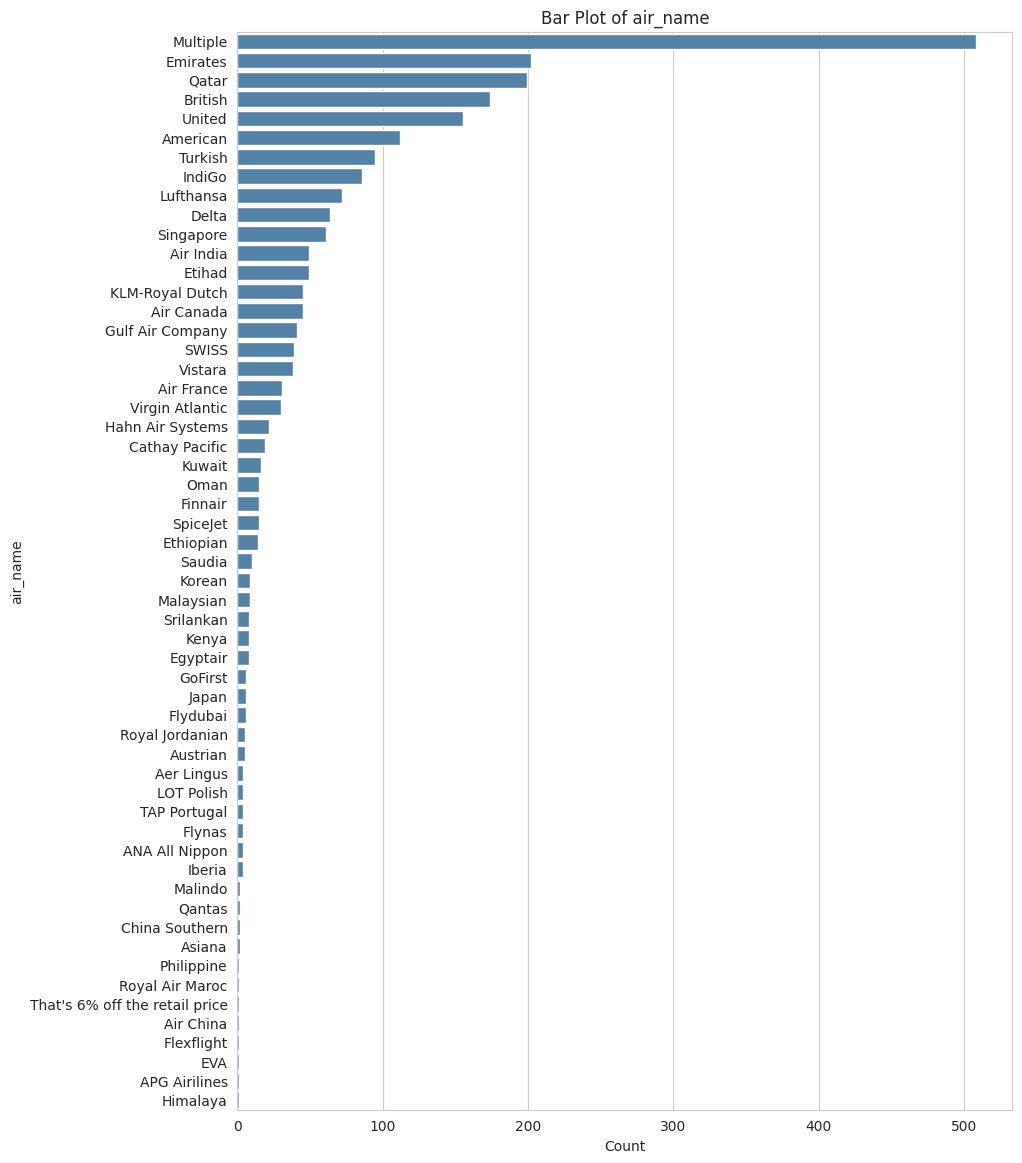

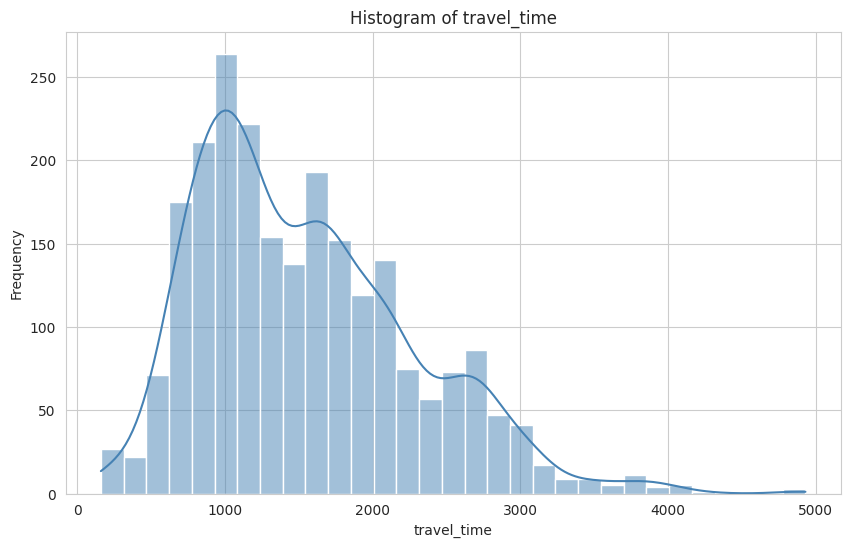

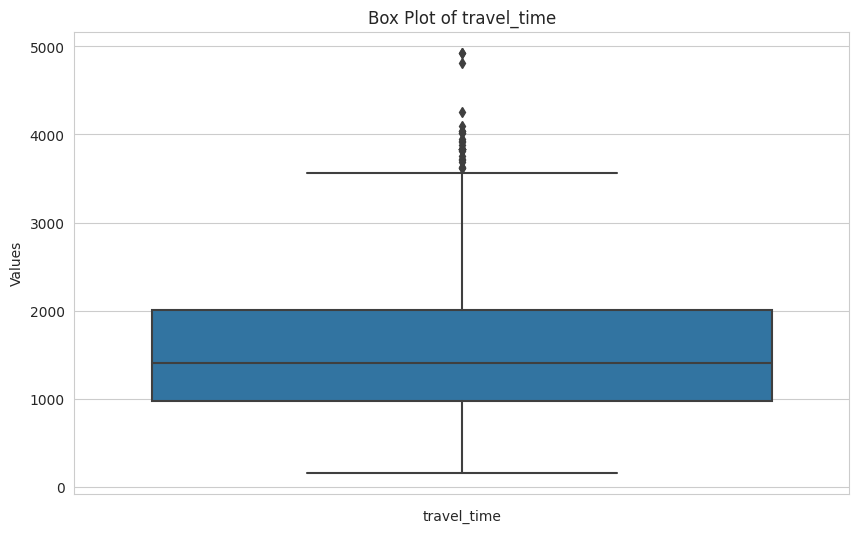

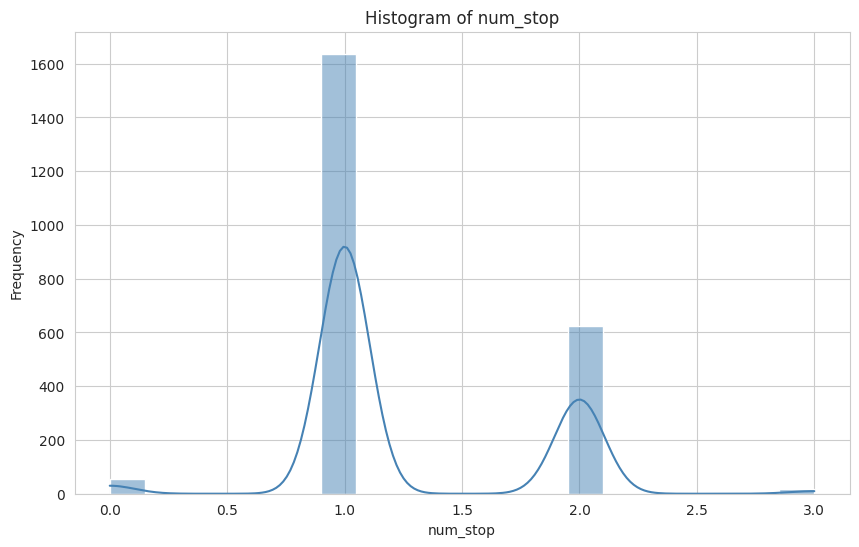

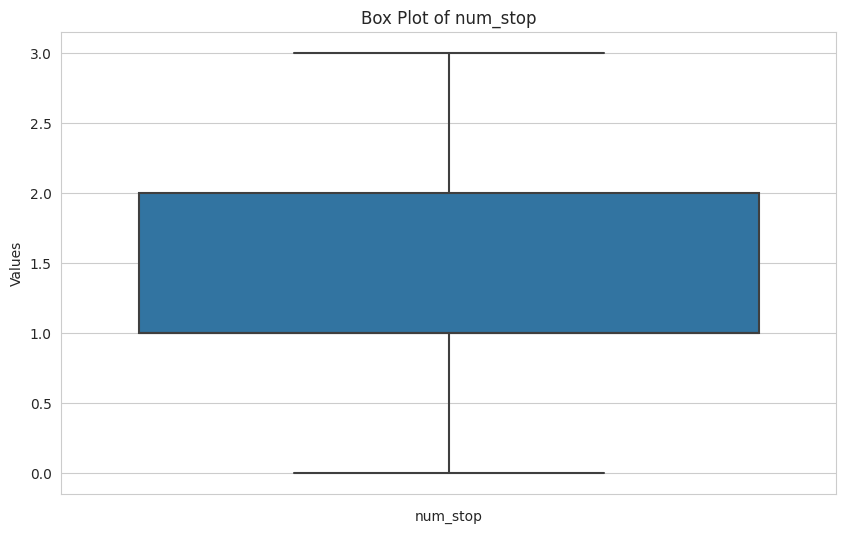

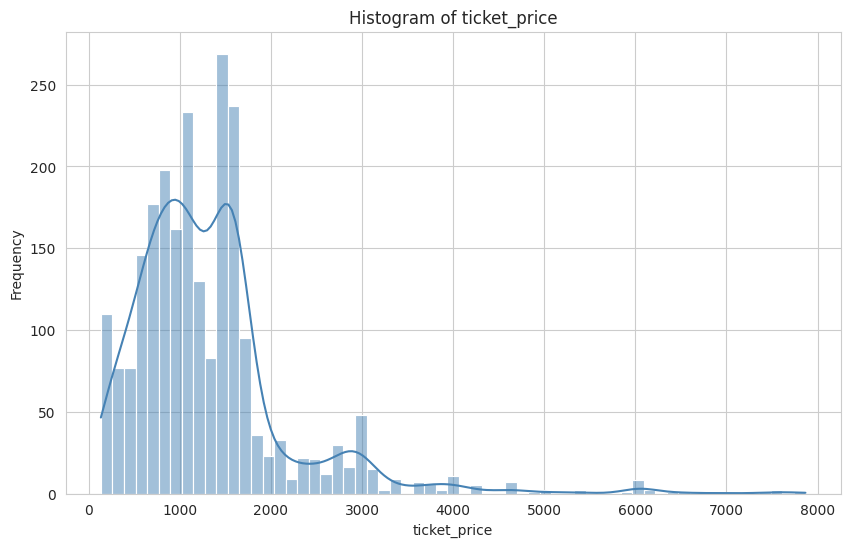

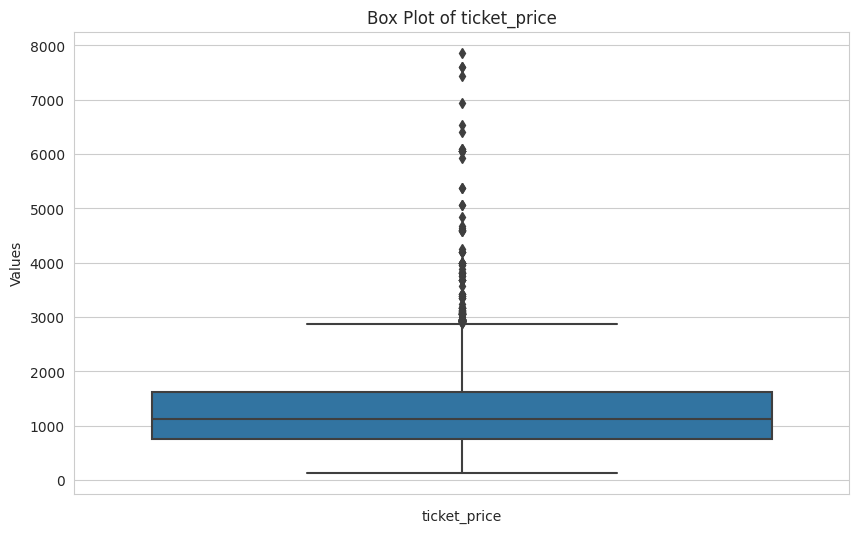

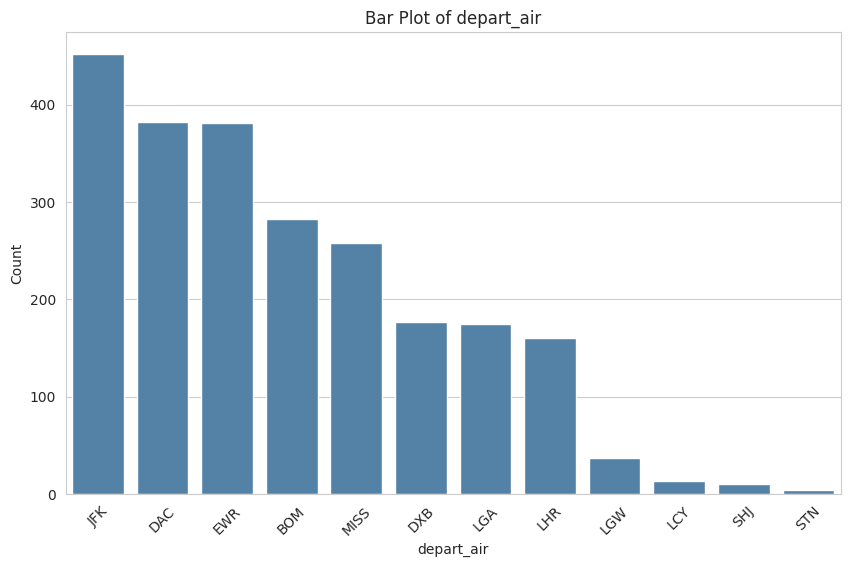

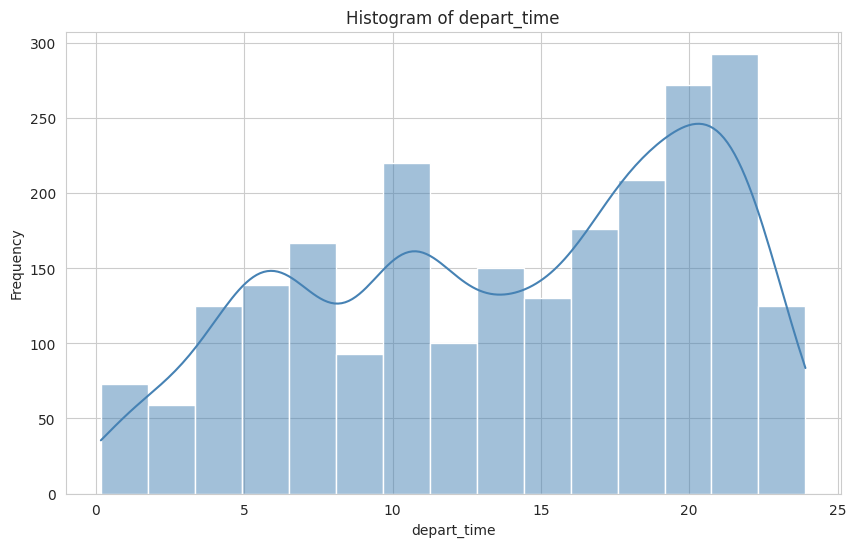

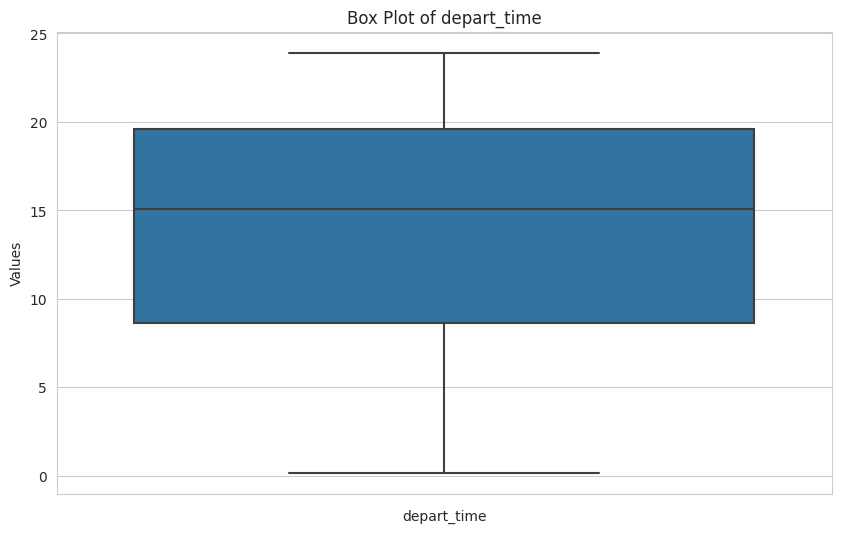

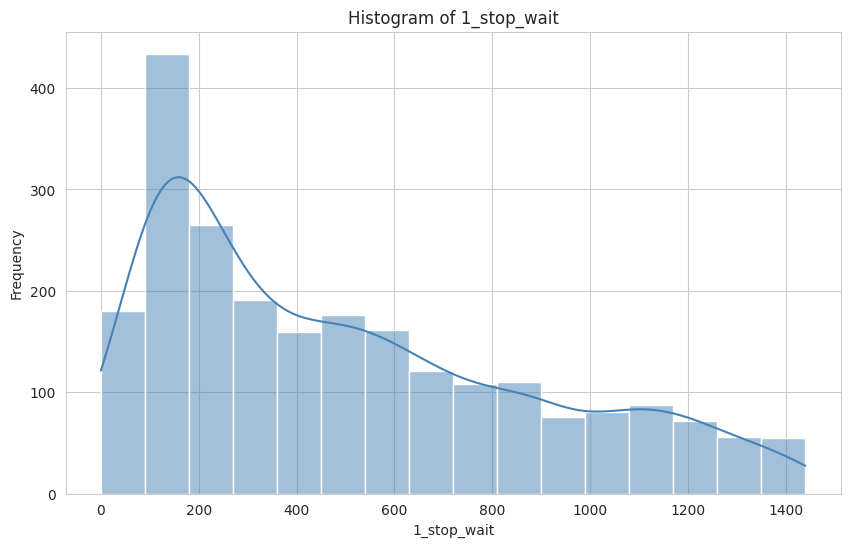

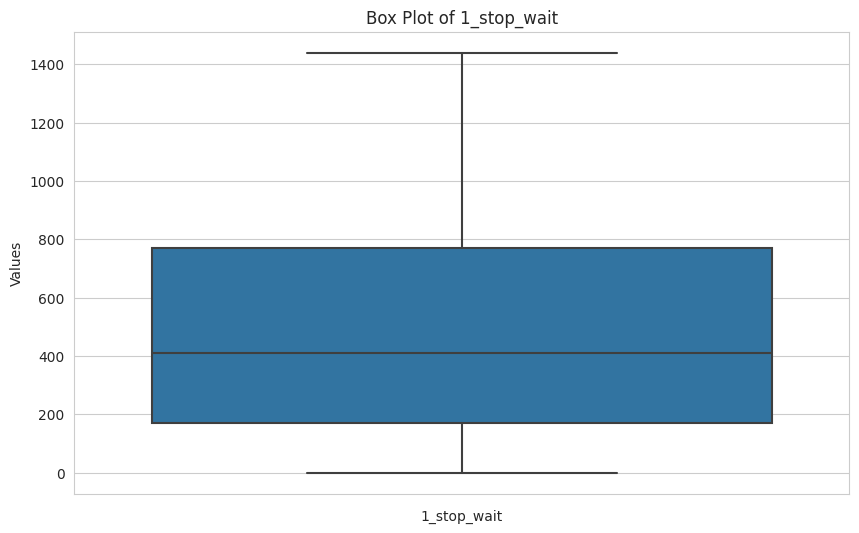

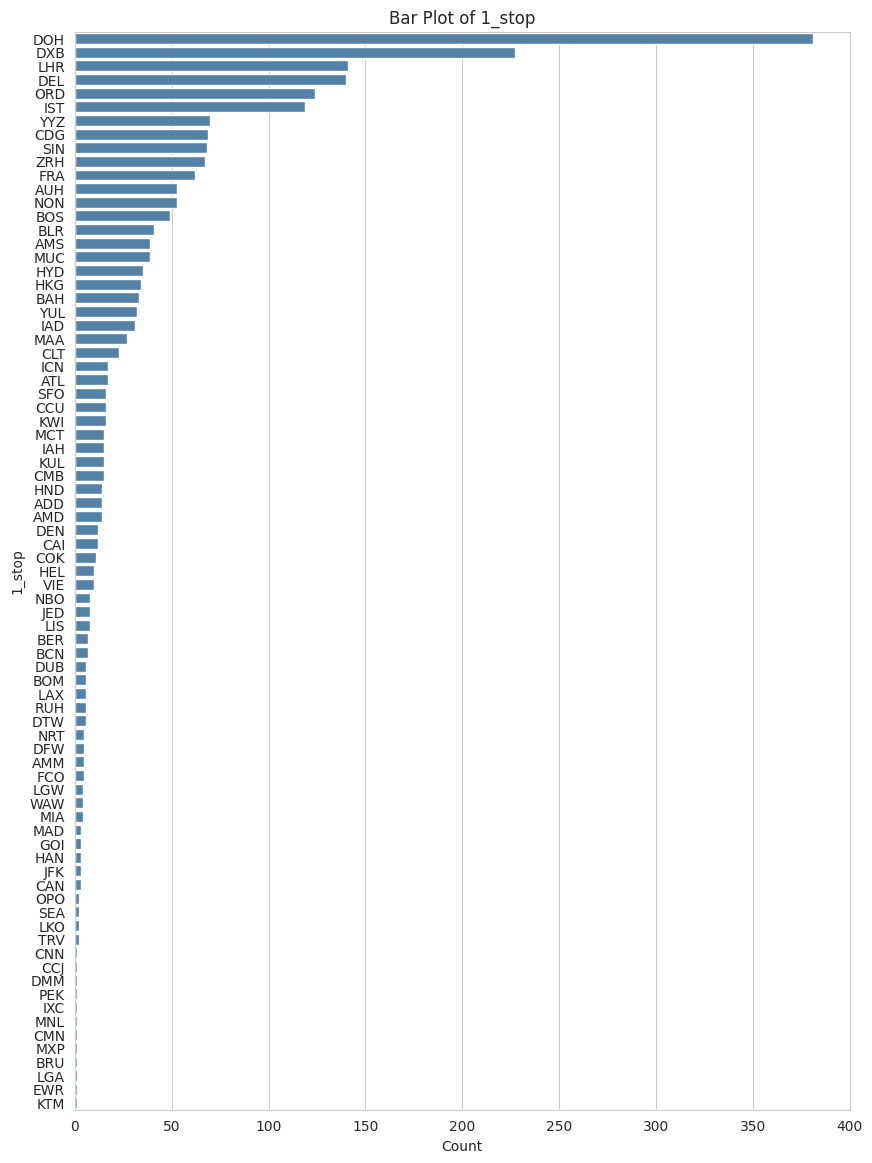

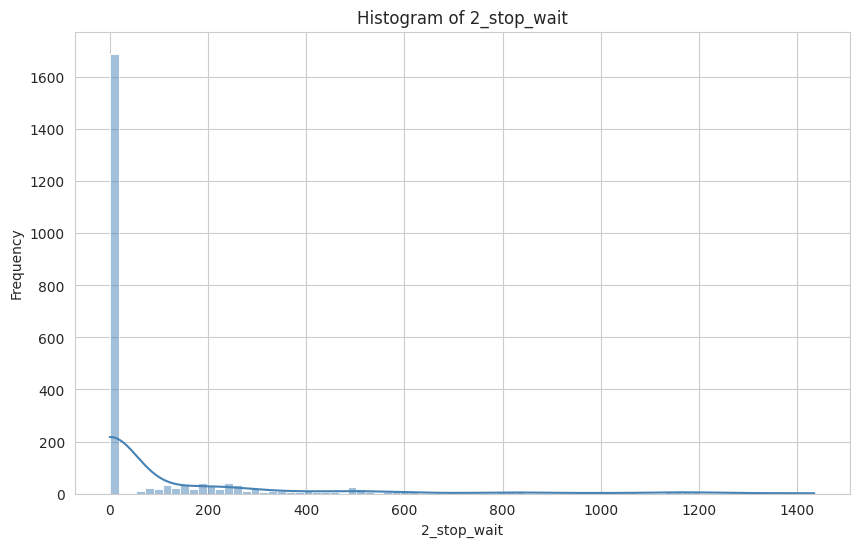

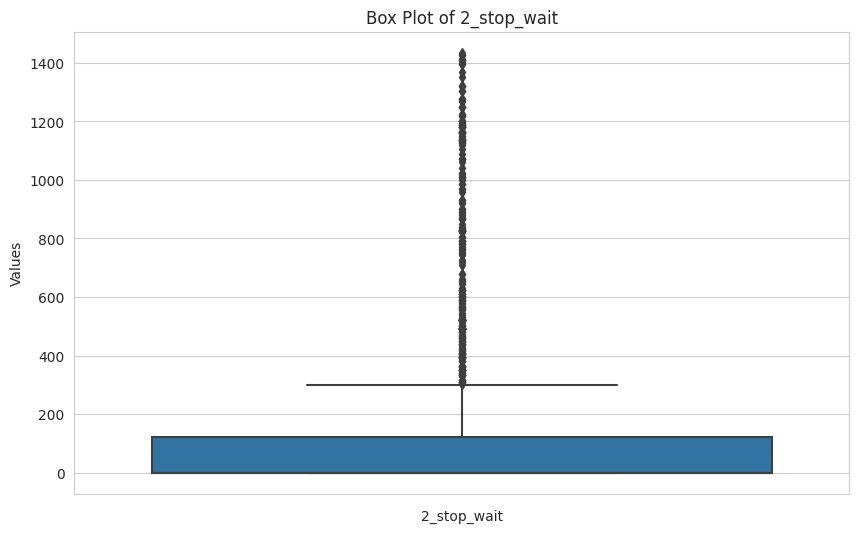

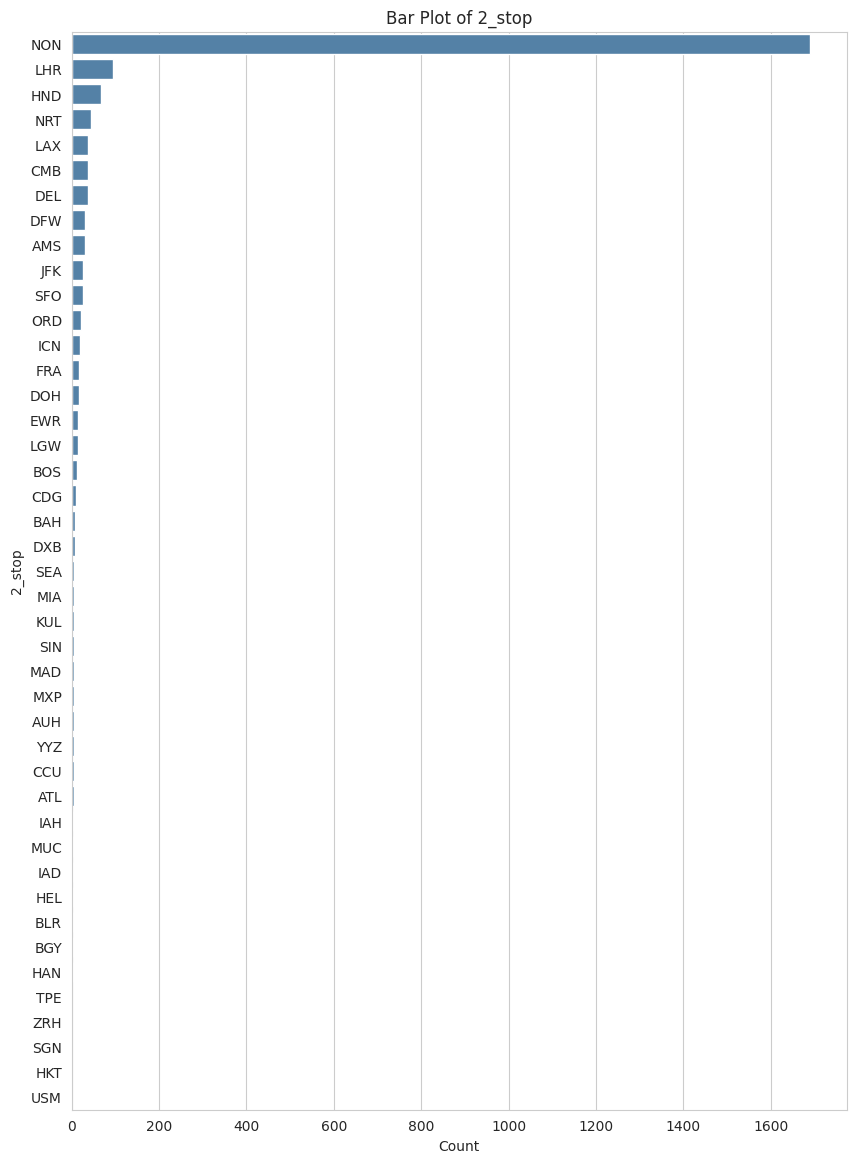

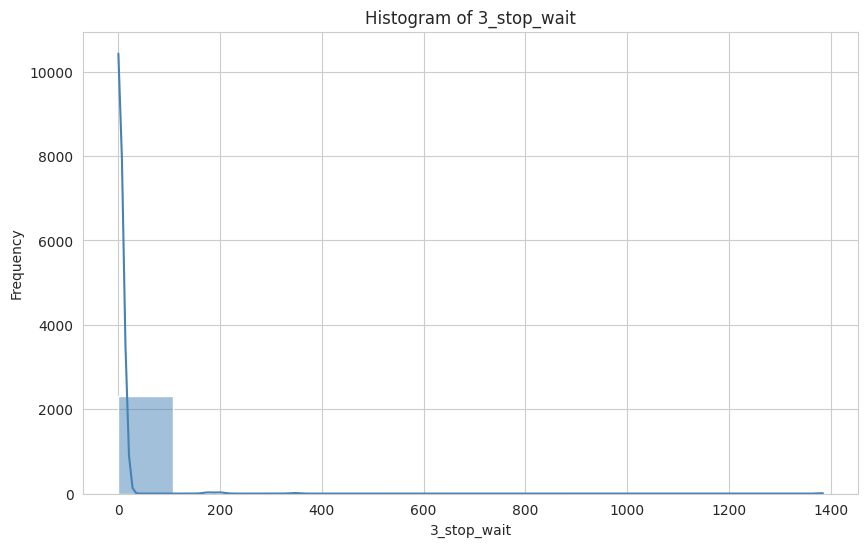

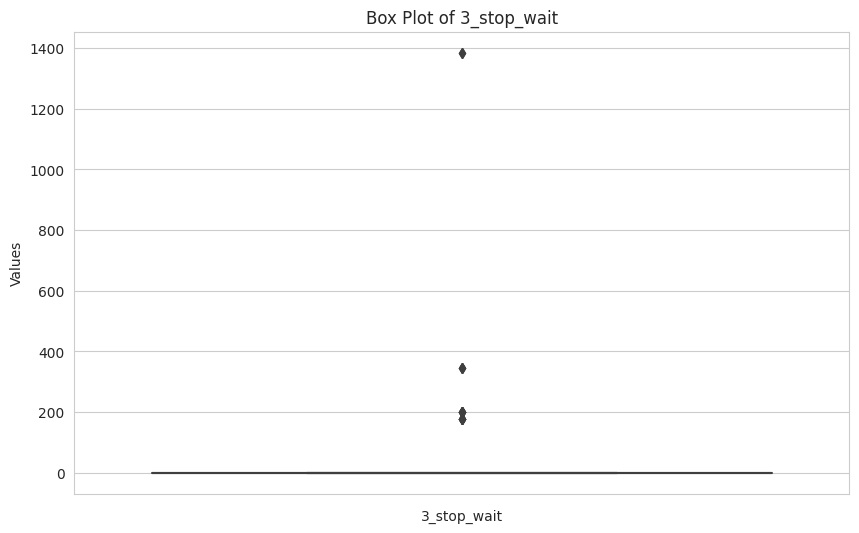

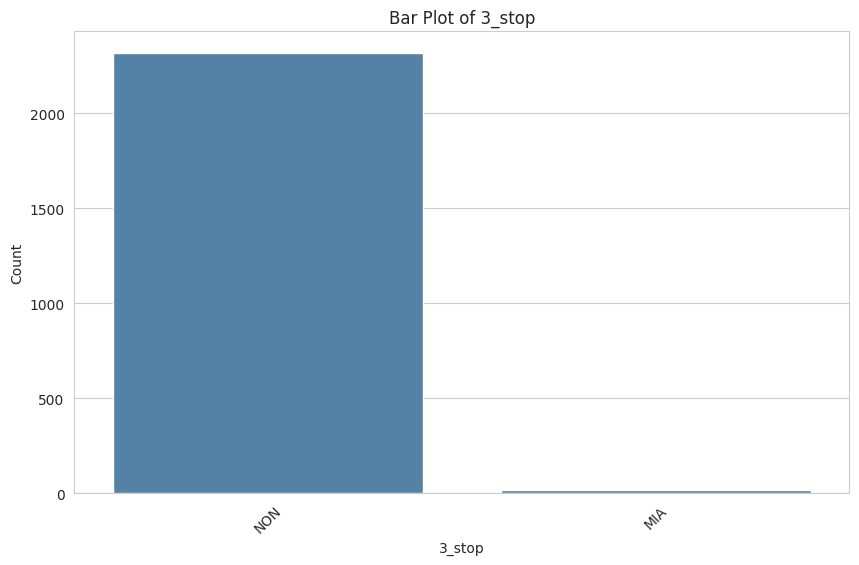

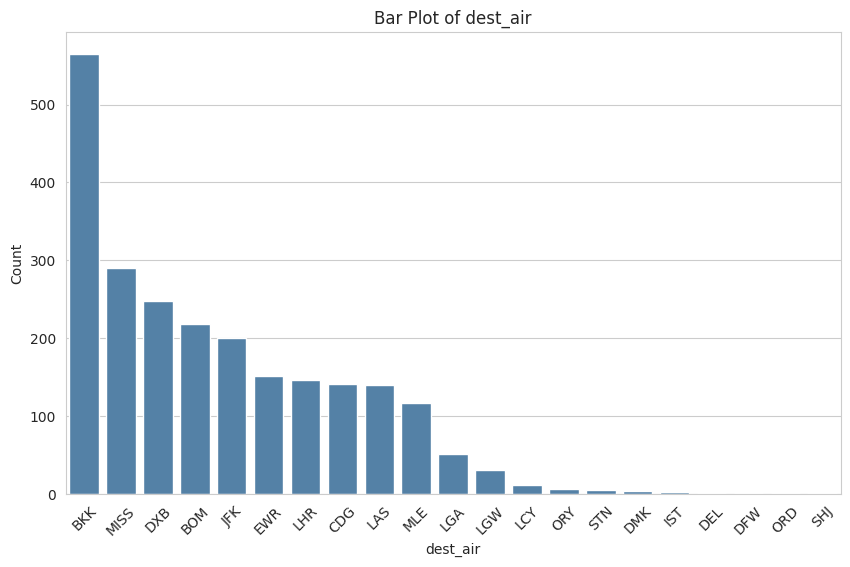

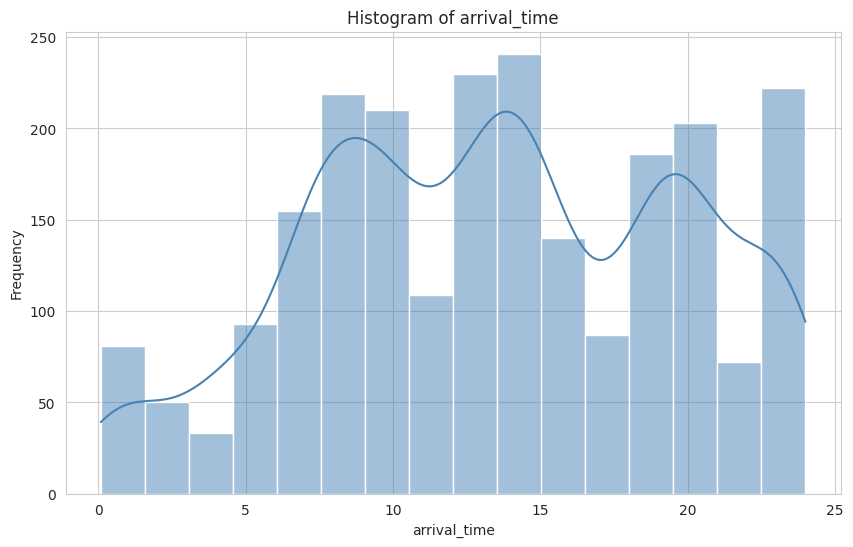

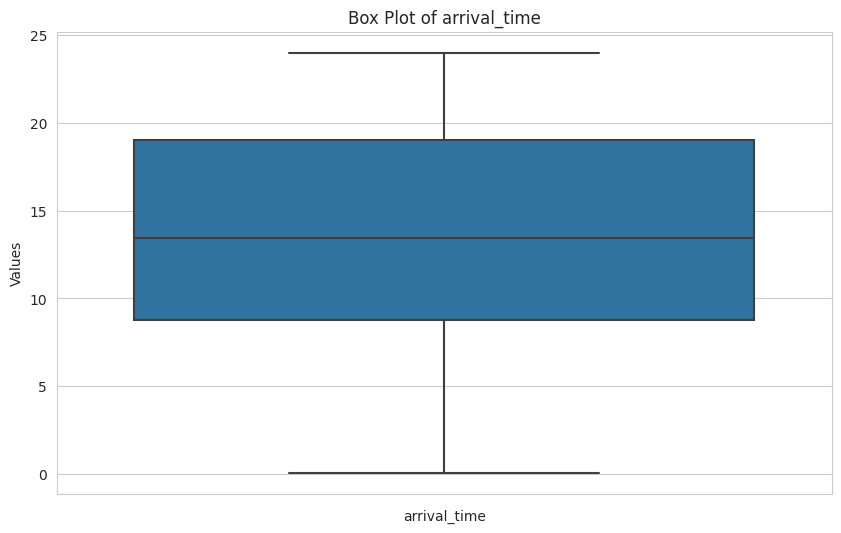

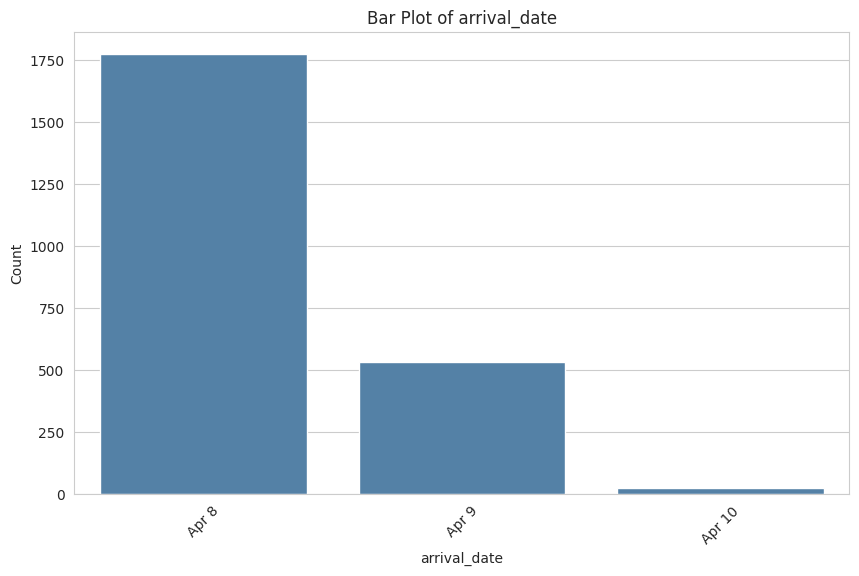

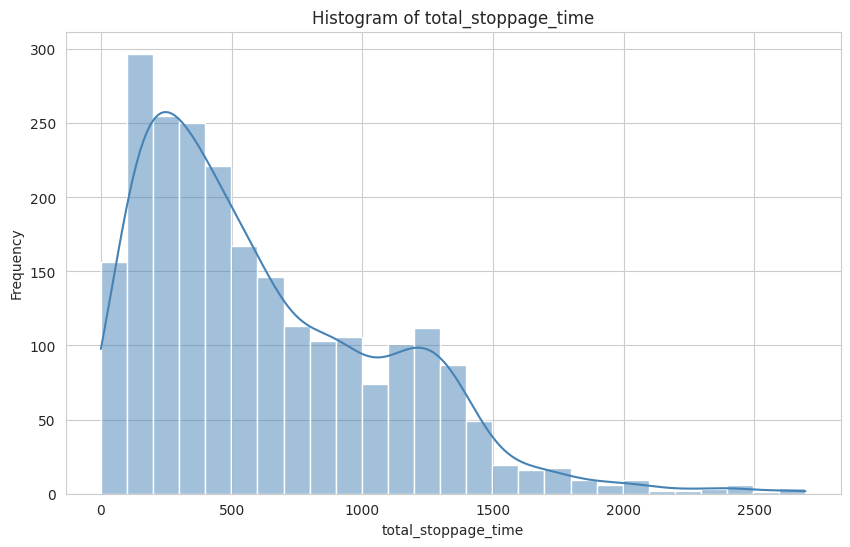

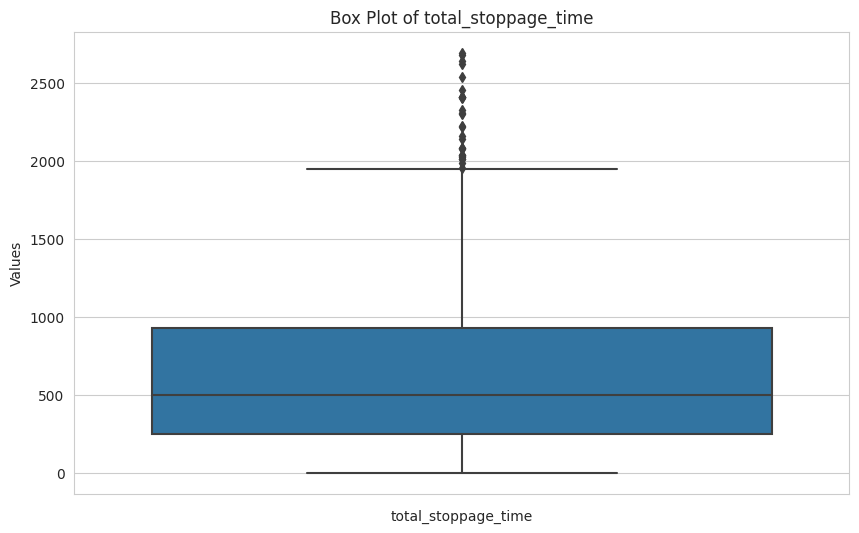

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def create_plots(df):
    sns.set_style('whitegrid')
    special_columns = ['air_name', '1_stop','2_stop' ]

    for column in df.columns:
        if df[column].dtype == 'object':  # Categorical data
            if column in special_columns:
                plt.figure(figsize=(10, 14))
                sns.countplot(y=df[column], order=df[column].value_counts().index, color='steelblue')
                plt.title(f'Bar Plot of {column}')
                plt.ylabel(column)
                plt.xlabel('Count')
                plt.show()
            else:
                plt.figure(figsize=(10, 6))
                sns.countplot(x=df[column], order=df[column].value_counts().index, color='steelblue')
                plt.title(f'Bar Plot of {column}')
                plt.xlabel(column)
                plt.ylabel('Count')
                plt.xticks(rotation=45)
                plt.show()

        else:  # Numerical data
            plt.figure(figsize=(10, 6))
            sns.histplot(df[column], kde=True, color='steelblue')
            plt.title(f'Histogram of {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.show()

            plt.figure(figsize=(10, 6))
            sns.boxplot(y=df[column])
            plt.title(f'Box Plot of {column}')
            plt.xlabel(column)
            plt.ylabel('Values')
            plt.show()


create_plots(df_flight)

### Scatter Plots of Numerical Features vs. Tickect Price

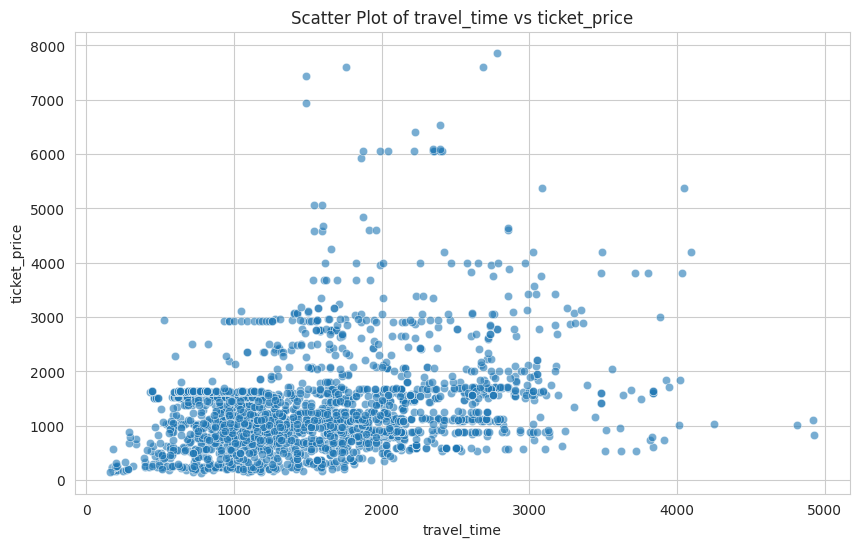

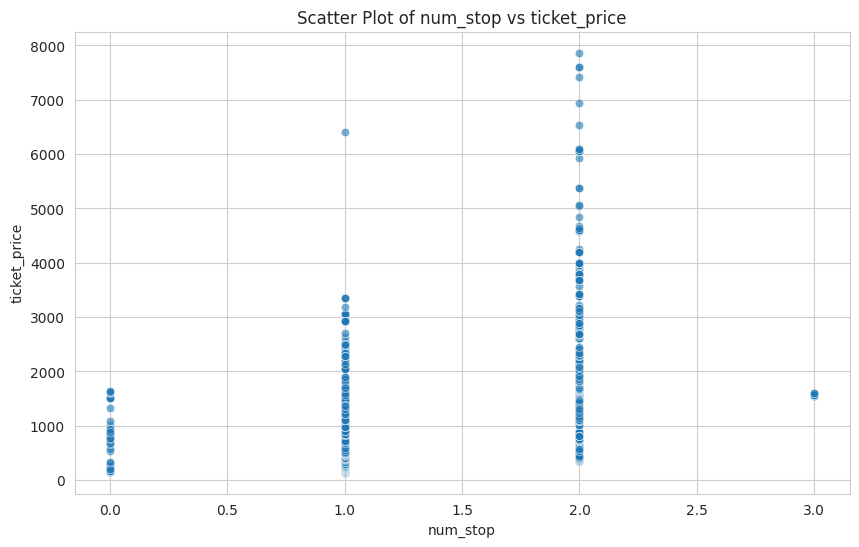

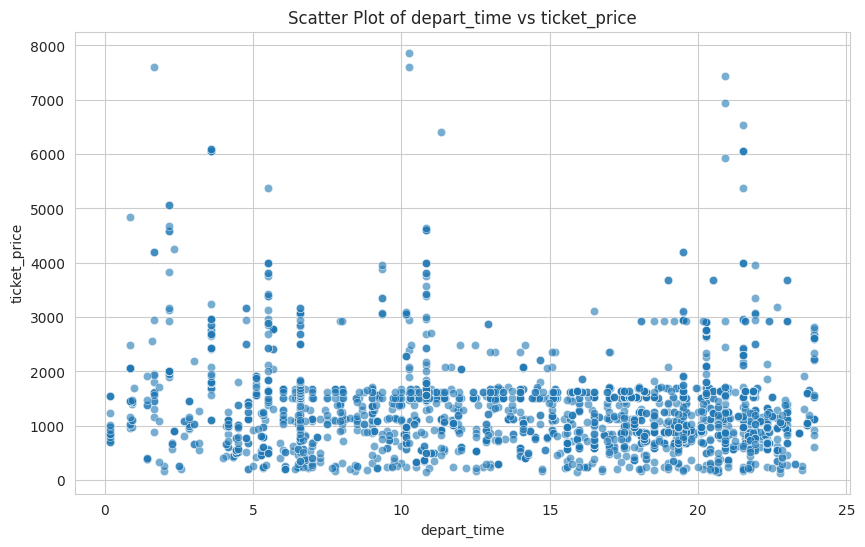

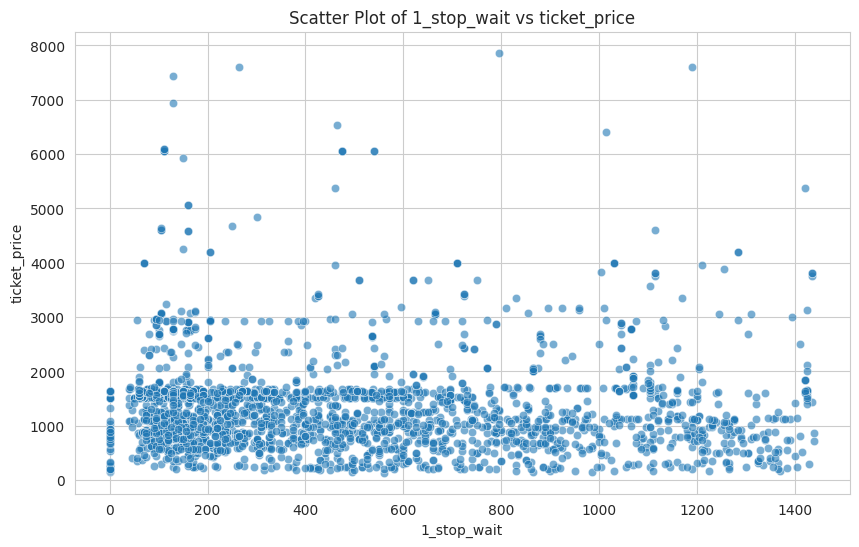

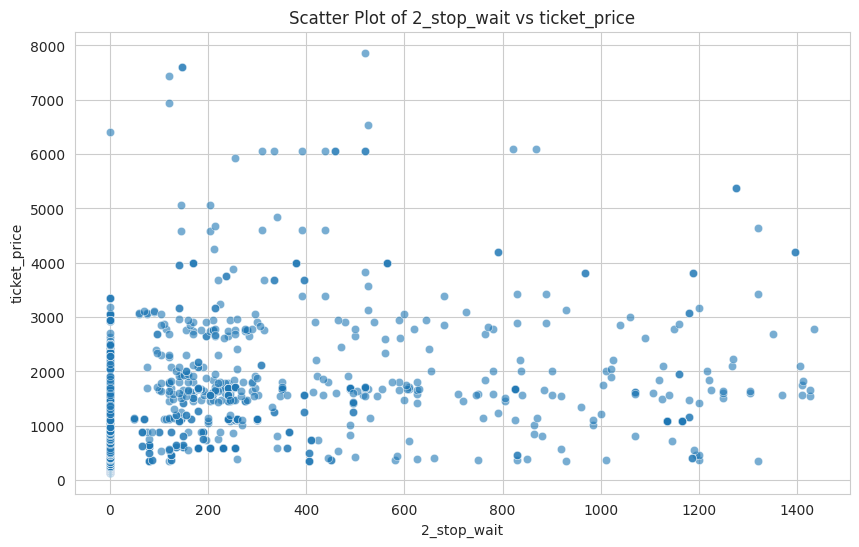

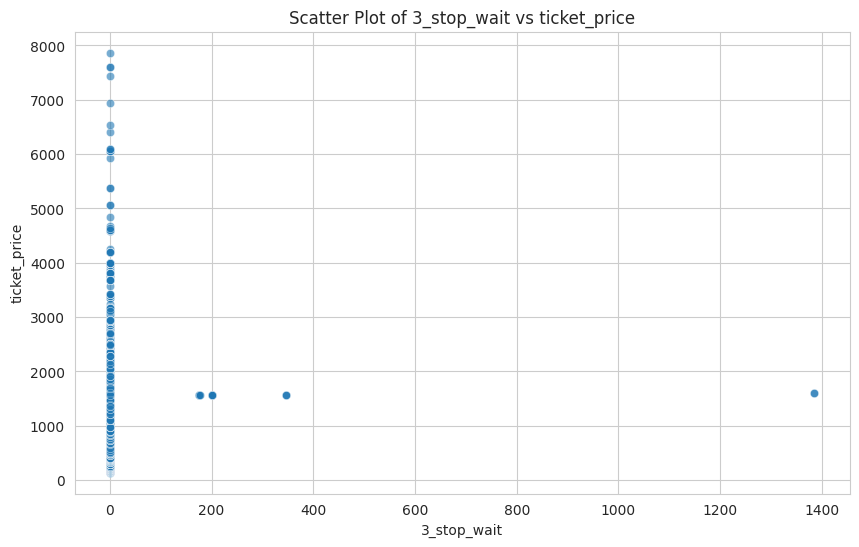

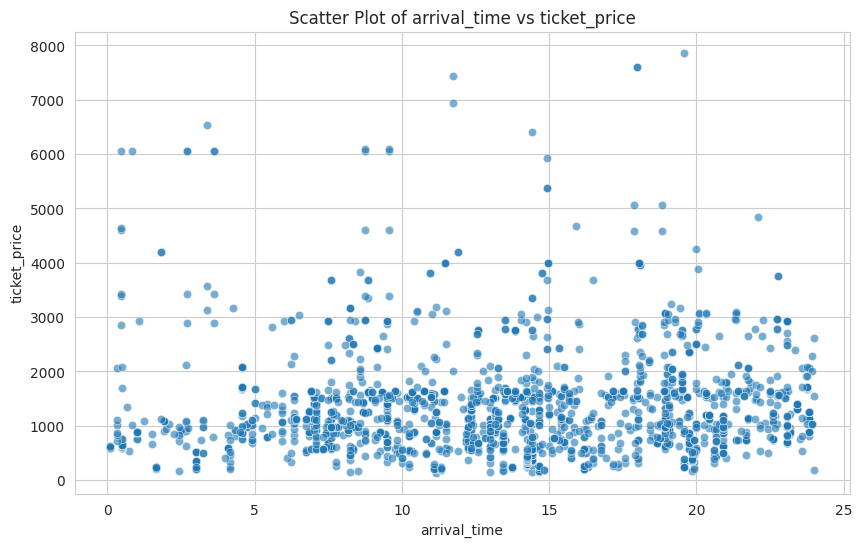

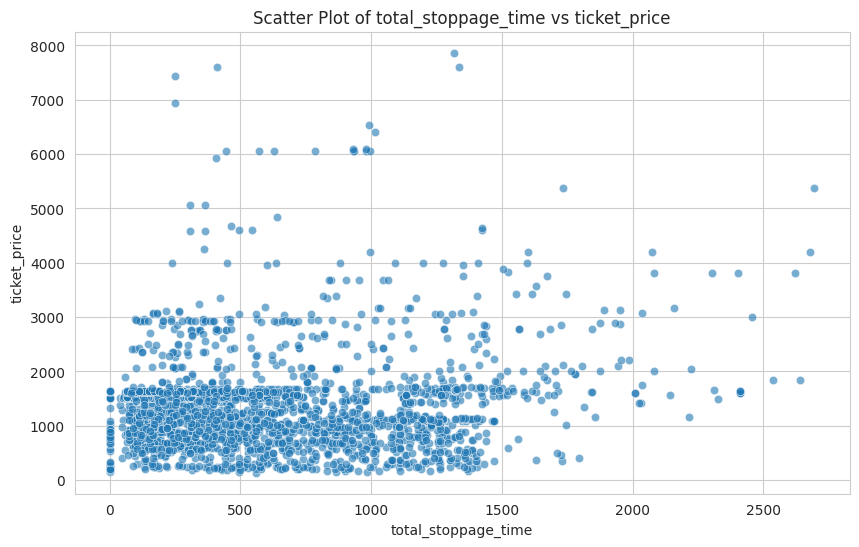

In [ ]:
def scatter_plots_with_price(df, price_column):
    # Filter out non-numerical columns
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

    for col in numerical_cols:
        if col != price_column:
            plt.figure(figsize=(10, 6))
            sns.scatterplot(x=df[col], y=df[price_column], alpha = 0.6)
            plt.title(f'Scatter Plot of {col} vs {price_column}')
            plt.xlabel(col)
            plt.ylabel(price_column)
            plt.show()


scatter_plots_with_price(df_flight, 'ticket_price')

### Correlation Plot

<ipython-input-35-608259c6ce59>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_flight.corr()


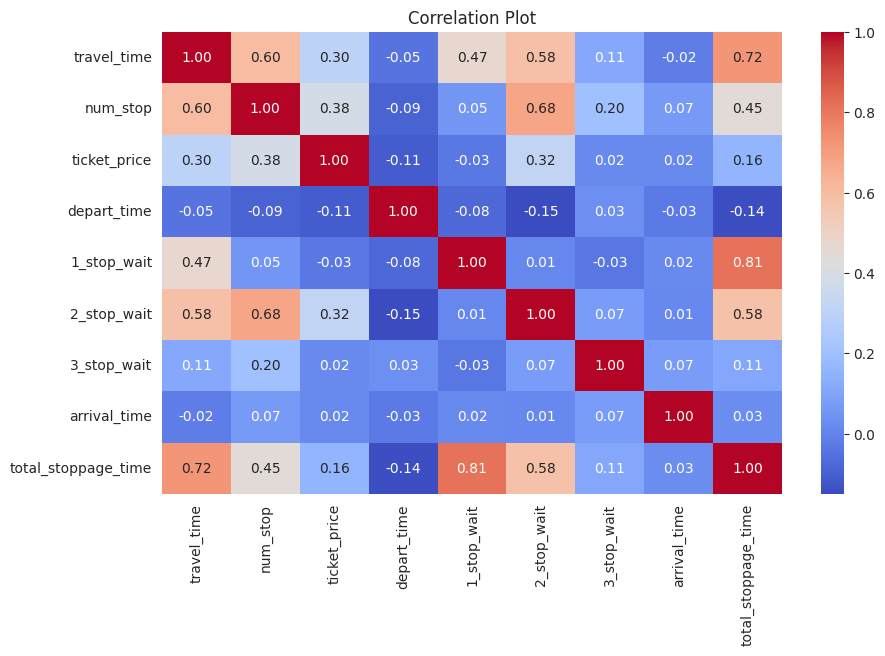

<Figure size 640x480 with 0 Axes>

In [ ]:
corr = df_flight.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',
                xticklabels=corr.columns, yticklabels=corr.columns)
plt.title('Correlation Plot')
plt.show()
plt.savefig("cor_plot")

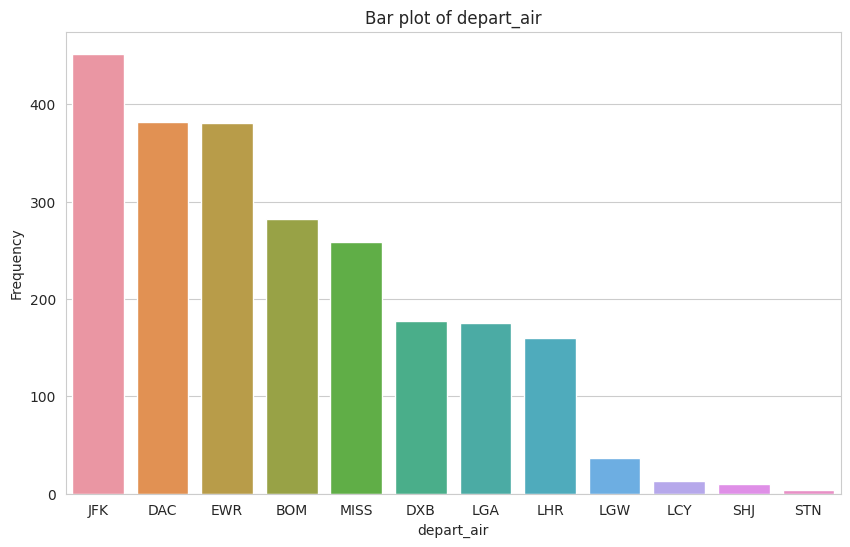

In [ ]:
# Sorted bar plot of 'depart_air'

sorted_df = pd.DataFrame(df_flight['depart_air'].value_counts().sort_values(ascending=False)).reset_index()
sorted_df.columns = ['depart_air', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(x='depart_air', y='count', data=sorted_df, order=sorted_df['depart_air'])
plt.title('Bar plot of depart_air')
plt.xlabel('depart_air')
plt.ylabel('Frequency')
plt.show()

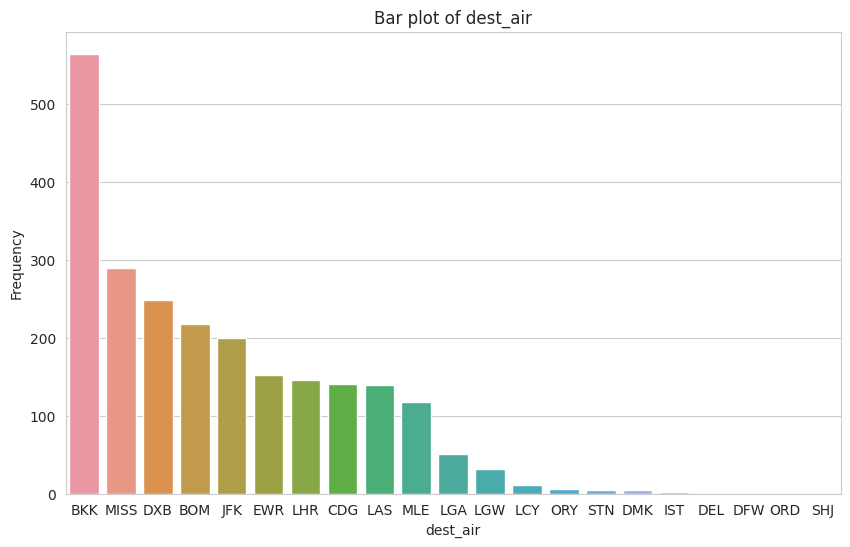

In [ ]:
# Sorted bar plot of 'dest_air'


sorted_df = pd.DataFrame(df_flight['dest_air'].value_counts().sort_values(ascending=False)).reset_index()
sorted_df.columns = ['dest_air', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(x='dest_air', y='count', data=sorted_df, order=sorted_df['dest_air'])
plt.title('Bar plot of dest_air')
plt.xlabel('dest_air')
plt.ylabel('Frequency')
plt.show()

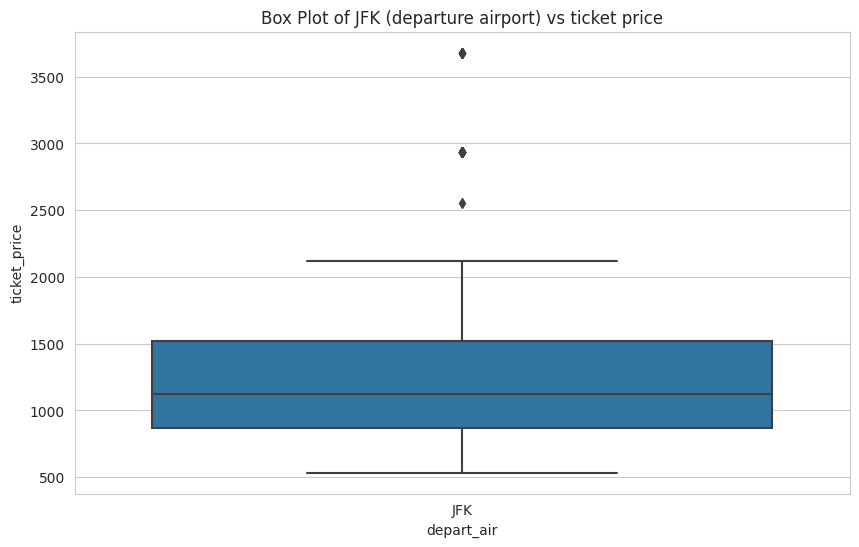

In [ ]:
# Boxplot of JFK (departure airport) ticket price
JFK = df_flight[df_flight['depart_air'] == 'JFK']

plt.figure(figsize=(10, 6))
sns.boxplot(x=JFK['depart_air'], y=JFK['ticket_price'])
plt.title('Box Plot of JFK (departure airport) vs ticket price')
plt.ylabel('ticket_price')
plt.show()

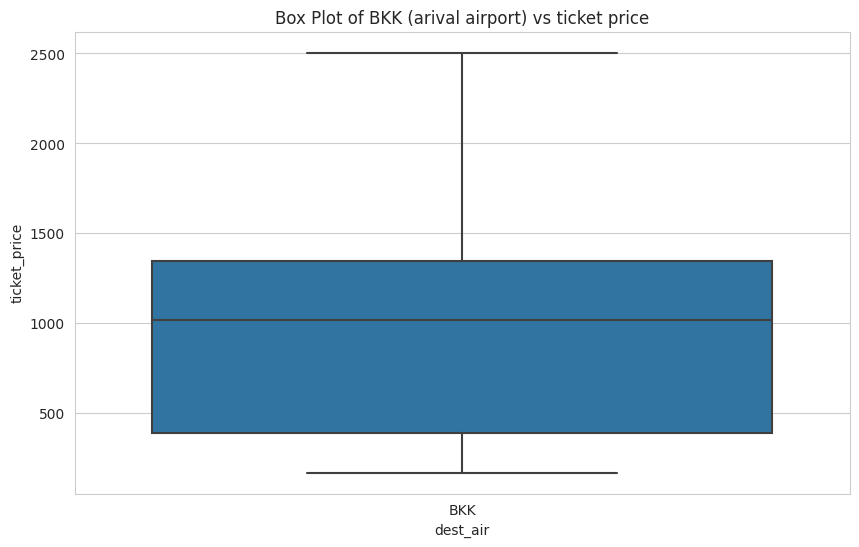

In [ ]:
# Boxplot of BKK (arrival airport) ticket price


BKK = df_flight[df_flight['dest_air'] == 'BKK']

plt.figure(figsize=(10, 6))
sns.boxplot(x=BKK['dest_air'], y=BKK['ticket_price'])
plt.title('Box Plot of BKK (arival airport) vs ticket price')
plt.ylabel('ticket_price')
plt.show()

# Baseline Model

In [ ]:
df_flight

,air_name,travel_time,num_stop,ticket_price,depart_air,depart_time,1_stop_wait,1_stop,2_stop_wait,2_stop,3_stop_wait,3_stop,dest_air,arrival_time,arrival_date,total_stoppage_time
0,Emirates,3075,2,1156,DAC,1.666667,675,DXB,1180,MXP,0,NON,JFK,18.916667,Apr 8,1855
1,Emirates,3445,2,1156,DAC,19.500000,1035,DXB,1180,MXP,0,NON,JFK,18.916667,Apr 9,2215
2,Turkish,1565,1,1175,DAC,6.583333,380,IST,0,NON,0,NON,EWR,22.666667,Apr 8,380
3,Kuwait,1275,1,1264,DAC,3.166667,130,KWI,0,NON,0,NON,JFK,14.416667,Apr 8,130
4,Etihad,1355,1,1283,DAC,20.916667,180,AUH,0,NON,0,NON,JFK,9.500000,Apr 8,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2326,Saudia,930,1,1692,DAC,1.000000,450,RUH,0,NON,0,NON,DXB,14.500000,Apr 8,450
2327,Multiple,600,1,2290,DAC,10.166667,225,DEL,0,NON,0,NON,DXB,18.166667,Apr 8,225
2328,Multiple,945,1,2290,DAC,10.166667,560,DEL,0,NON,0,NON,DXB,23.916667,Apr 8,560
2329,Multiple,1330,1,2290,DAC,10.166667,945,DEL,0,NON,0,NON,DXB,6.333333,Apr 8,945


In [ ]:
# process features

cat_vars = ['air_name', 'depart_air', '1_stop', '2_stop', '3_stop', 'dest_air']
num_vars = df_flight_impute.select_dtypes(include=['int64', 'float64']).columns.tolist()

# One-Hot Encoding for categorical variables
ohe = OneHotEncoder(drop='first',
                    sparse_output=False,
                    handle_unknown='ignore')
ohe.fit(df_flight[cat_vars])
ohe_df = ohe.transform(df_flight[cat_vars])

# StandardScaler for numerical variables
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_flight[num_vars])

# Combine categorical and numerical variables
combined_df = np.hstack([ohe_df, scaled_df])
combined_df

array([[ 0.        ,  0.        ,  0.        , ...,  3.98787267,
        -0.05853242,  0.87853798],
       [ 0.        ,  0.        ,  0.        , ...,  3.98787267,
        -0.05853242,  0.87853798],
       [ 0.        ,  0.        ,  0.        , ..., -0.44285892,
        -0.05853242,  1.48396032],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.44285892,
        -0.05853242,  1.68576777],
       [ 0.        ,  0.        ,  0.        , ..., -0.44285892,
        -0.05853242, -1.15299033],
       [ 0.        ,  0.        ,  0.        , ..., -0.44285892,
        -0.05853242,  1.55122947]])

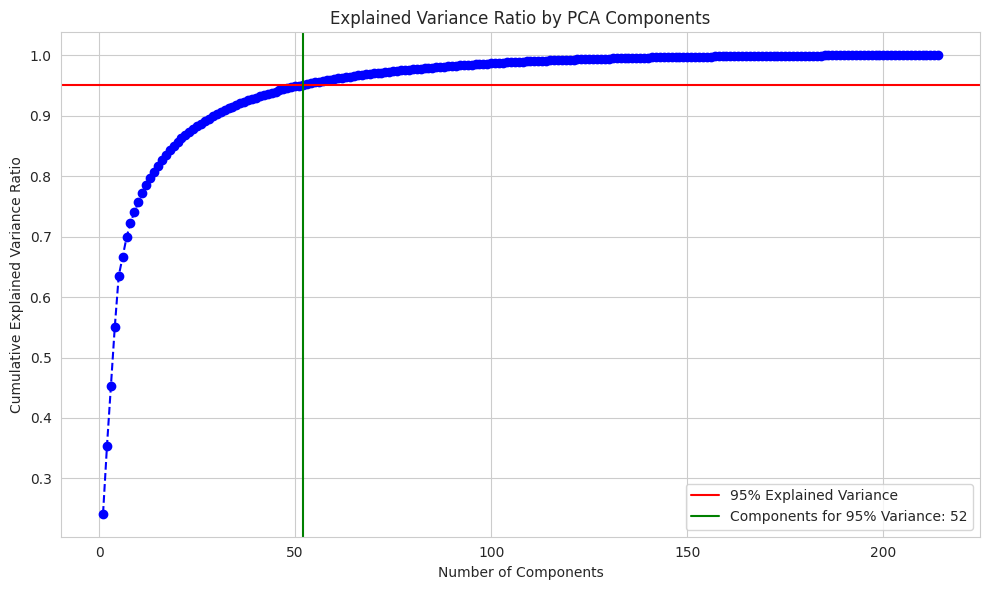

52


In [ ]:
pca = PCA(n_components=combined_df.shape[1])
df_pca = pca.fit_transform(combined_df)

cumulative_variance = pca.explained_variance_ratio_.cumsum()
num_features = combined_df.shape[1]

n_components_95 = np.where(cumulative_variance >= 0.95)[0][0] + 1


plt.figure(figsize=(10, 6))
plt.plot(range(1, num_features + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Explained Variance')
plt.axvline(x=n_components_95, color='g', linestyle='-', label=f'Components for 95% Variance: {n_components_95}')

plt.title('Explained Variance Ratio by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
print(n_components_95)